# The Solow model with Oil and climate change

Imports and set magics:

In [13]:
import numpy as np
from scipy import optimize
from scipy import linalg
import sympy as sm
import matplotlib.pyplot as plt

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject
from modelproject import OilSolowModelClass
model = OilSolowModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
initializing the model
calling.setup()


# Model description

This model project is inspired by the Macroeconomics I exam from 17th feburay 2020. It is a solow model in a closed economy with an exhaustible
natural resource (oil) it includes economic damage to the production output from climate change with the fraction D.



$$
\begin {aligned}
Y_t &= [1 - D_t] K_t^\alpha (A_tL_t)^\beta E_t^\eta, \alpha, \beta, \eta >0, \alpha +\beta +\eta =1 \\
D_t &= 1 - \frac{R_t}{R_0}^\phi , \phi    >= 0    \\
R_{t+1} &= R_t - E_t,             R_0>0                \\
E_t &= s_E R_t, 0< s_E <1                                     \\
K_{t+1} &= sY_t + (1 - \delta )K_t, 0 < s < 1, 0 < \delta <1, k_0 > 0               \\
L_{t+1} &= (1 + n)L_t, L_0 > 0                              \\
A_{t+1} &= (1 + g)A_t, A_0 > 0                               \\
\end {aligned}
$$

The first equation is a Cobb-Douglas production function describing total output $(Y_t)$ as a function of the physikal capital $(K_t)$, labor $(L_t)$, technology $(A_t)$ and oil $(E_t)$. We assume that climate change reduce the production by a share $D_t$, giving us a damage to the production $(D_tY_t)$ and the share $1-D_t$ survives to cunsumption and investments. The damage by the climate change is given in equation 2 where the climate damages depends on the consumption of oil. If $R_t=R_0$ there is no climate damages, giving us that $D_t=0$ and all the output can be used. The development in the total oil stock $(R_t)$ is givin by equation 3 and 4 where $E_t$ us the consumption of oil and $sE$ is the production og oil. The capital accumulation is described by equation 5 with $s$ as savings rate and $\delta$ the depriciation in capital. Equation 6 and 7 decribes how technology $(A_T)$ and labor $(L_t)$ develops over time. 

we define $y_t= \frac{Y_t}{L_t}, k_t = \frac{K_t}{L_t}, e_t = \frac{E_t}{L_t}$ and $ z_t= \frac{k_t}{y_t}$

## Analytical solution

If your model allows for an analytical solution, you should provide here.

Så laver vi lidt tekst

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

As the model includes climate damages and dammages the production when oil is used, we wish to analyse how the climate damages develop over time if $\phi > 0$. We find the size of the share of lost production caused by climate change after 50 years. This is done by solving for $D_t$
$$
\begin {align*}
R_{t+1} &= R_t - s_E R_t \\
R_{t+1} &= (1-s_E)R_t\\
R_t &= R_0(1-s_E)^t \\
D_t &= 1- \left(\frac{R_0(1-s_E)^t}{R_0}\right)^\phi\\
D_t &= 1- (1- s_E))^{\phi t}
\end {align*}
$$

We solve this numerically and get the following:

In [27]:
model.solve_climate_damage()
model.calculate_D_t()

0.22168744293135811

This shows us that  78 pct. of the output survives the climate damages to the economy after 50 years. Giving us a climate damage from the oil consumption of 22 pct. of the total output. The development of climate damages to the output over time is shown in figure 1. We see that this is a concave increasing function that goes toward 1.

initializing the model
calling.setup()


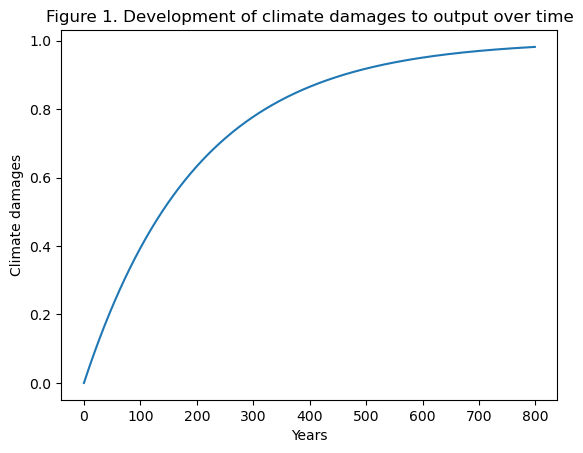

In [46]:
model = OilSolowModelClass()
model.solve_climate_damage()

t = np.arange(800)
D_t = [model.calculate_D_t(i) for i in t]

plt.plot(t, D_t)
plt.title('Figure 1. Development of climate damages to output over time')
plt.xlabel('Years')
plt.ylabel('Climate damages')
plt.show()

# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

# Simulation og changes in oil consumption

We wish to show that the model shows balanced growth - both with and without climate change (meaning both $\phi =0,5$ and $\phi =0$)

# Conclusion

Add concise conclusion. 